## **Problem Statement**
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the system.

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine end across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around ans stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### **Business Goal:**

 - Model development for shared bikes demand based on available independent variables.
 - This model will be used by the management to understand how exactly the demands vary with different features.
 - Management can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
 - Further, the model will be a good way for management to understand the demand dynamics of a new market.





In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_validate


# Warning modules to handle warnings
import warnings
warnings.filterwarnings('ignore')

# To display all the columns of dataframes
pd.set_option('display.max_columns', None)

### **Data Loading**

In [4]:
# Reading the .csv format Dataset
bike = pd.read_csv(r'day.csv')

# Checking first five rows and all the columns of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Description of all the columns in the dataset**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [6]:
# Checking shape of the dataset
print(f"Bike dataset consists of {bike.shape[0]} rows and {bike.shape[1]} columns")

Bike dataset consists of 730 rows and 16 columns


In [7]:
# Checking bike dataframe basic information
bike.info()

# float, int, object datatype can be observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking NUll values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Zero null value in the dataset

In [10]:
# Checking Duplicates in the dataset
bike.duplicated().sum()

0

- No duplicates in the dataset

In [12]:
# Checking basic statistics of the bike dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Data Check and Cleaning**

- Target/dependent variable is `cnt` i.e. count of total rental bikes including both casual and registered. So, we will be dropping `casual` and `registered` columns from bike dataset

In [15]:
bike = bike.drop(columns=['casual','registered'], axis=1)

- `instant` is a record index which doesn't contribute to model building process, so safely can be removed

In [17]:
bike = bike.drop(columns=['instant'], axis=1)

In [18]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Checking workingday column 
bike.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

**Where,**
- `0` = Non working day
- `1` = Working day

In [21]:
# Checking mnth column
bike.mnth.value_counts().sort_index(ascending=True)

mnth
1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64

- It consists of month from Janunary to December respectively

In [23]:
# Checking season column
bike.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

**Where,**
- 1 = spring
- 2 = summer
- 3 = fall
- 4 = winter

In [25]:
# Checking yr column
bike.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

**Where,**
- 0 = 2018
- 1 = 2019

In [27]:
bike.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

**Where,**
- 0 = No holiday
- 1 = Holiday

In [29]:
bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

Where,
- 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
- 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [31]:
# Checking dteday column
bike.dteday.value_counts()

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

- We will be dropping `dteday` column from the bike dataset as `weekday`, `mnth` and `yr` contains similar values

In [33]:
bike = bike.drop('dteday', axis=1)

In [34]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
# Bike dataset shape after initial duplicated, null value and column dropping phase
bike.shape

(730, 12)

**Handling Categorical Variables**

In [37]:
# Replacing numbers to their equivalent season values
season_dict = {1: 'spring',
          2: 'summer', 
          3: 'fall', 
          4: 'winter'}
bike['season'].replace(season_dict, inplace=True)

In [38]:
# Replacing numbers to their equivalent weathersit (weather situation) values
weatherit_dict = {1: 'Best',
                  2: 'Good',
                  3: 'Bad',
                  4: 'Severe'}
bike['weathersit'].replace(weatherit_dict, inplace=True)

In [39]:
# Replacing numbers to their equivalent weekday values
weekday_dict = {0: 'Tue',
                1: 'Wed',
                2: 'Thu',
                3: 'Fri',
                4: 'Sat', 
                5: 'Sun',
                6: 'Mon'}
bike['weekday'].replace(weekday_dict, inplace=True)

In [40]:
# Replacing numbers to their equivalent mnth (month) values
month_dict = {1: 'Jan',
              2: 'Feb',
              3: 'Mar',
              4: 'Apr',
              5: 'May',
              6: 'Jun',
              7: 'Jul',
              8: 'Aug',
              9: 'Sep',
              10: 'Oct',
              11: 'Nov',
              12: 'Dec'}
bike['mnth'].replace(month_dict, inplace=True)

In [41]:
# Checking bike dataset after some categorical columns conversion
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Good,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Good,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Best,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Best,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Best,9.305237,11.46350,43.6957,12.522300,1600


- It seems `workingday` variable is contradicting `weekday`.
- As per data dictionary `workingday` value condition is ***if day is neither weekend nor holiday is 1, otherwise is 0.***

In [43]:
# This returns working day as 0 when holiday is 0 or weekday is "Sat" or "Sun" otherwise it returns 1

bike['workingday'] = bike.apply(lambda x: 0 if x['holiday'] == 1 or x['weekday'] in ['Sat', 'Sun'] else 1, axis=1)

In [44]:
# Updated bike Dataset
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Good,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Good,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Best,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Best,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Best,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Best,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Good,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Good,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Best,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Best,6.184153,7.54440,48.2917,14.958889,1321


### **Univariate Analysis**

 ##### **Visualizing Numerical Variables**

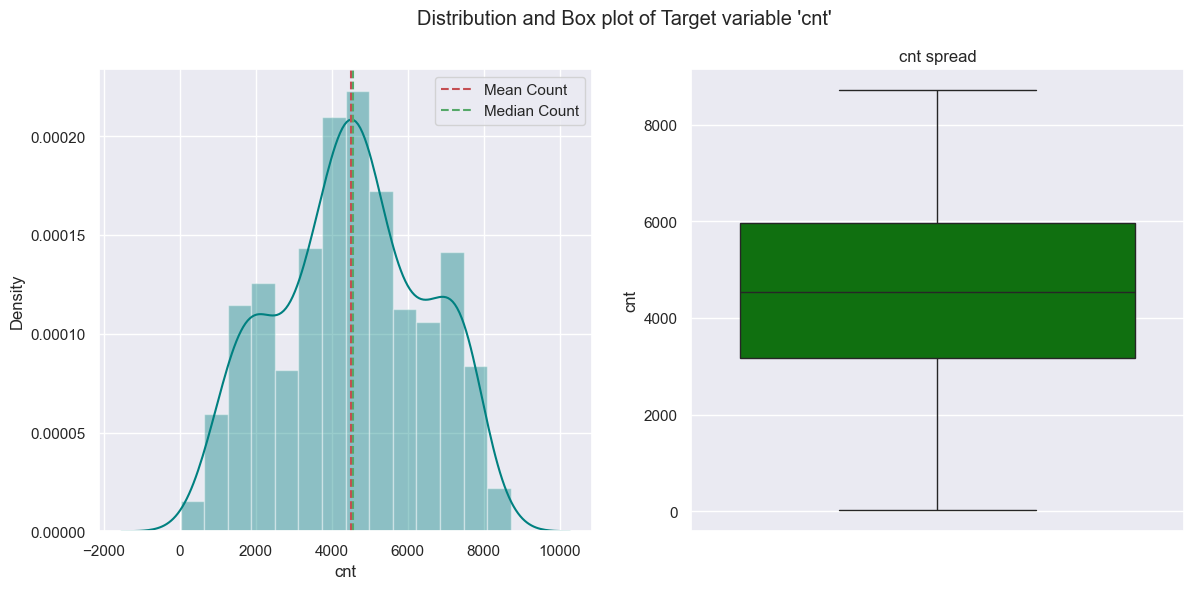

In [47]:
# Distribution of the target variable i.e. cnt
plt.figure(figsize=(14,6))
sns.set_theme(style='darkgrid')

# Dist plot
plt.subplot(1,2,1)
sns.distplot(bike['cnt'], color='teal')
plt.axvline(bike['cnt'].mean(), color='r', linestyle='--', label='Mean Count')
plt.axvline(bike['cnt'].median(), color='g', linestyle='--', label='Median Count')
plt.legend()

# Box plot
plt.subplot(1,2,2)
plt.title('cnt spread')
sns.boxplot(y=bike['cnt'], color='green')

plt.suptitle("Distribution and Box plot of Target variable 'cnt'")
plt.show()

In [48]:
# Checking target variable skewness
round(bike.cnt.skew(),3)

-0.05

 - Target variable i.e. `cnt` is fairly symmetrical and can be said that it follows a normal distribution

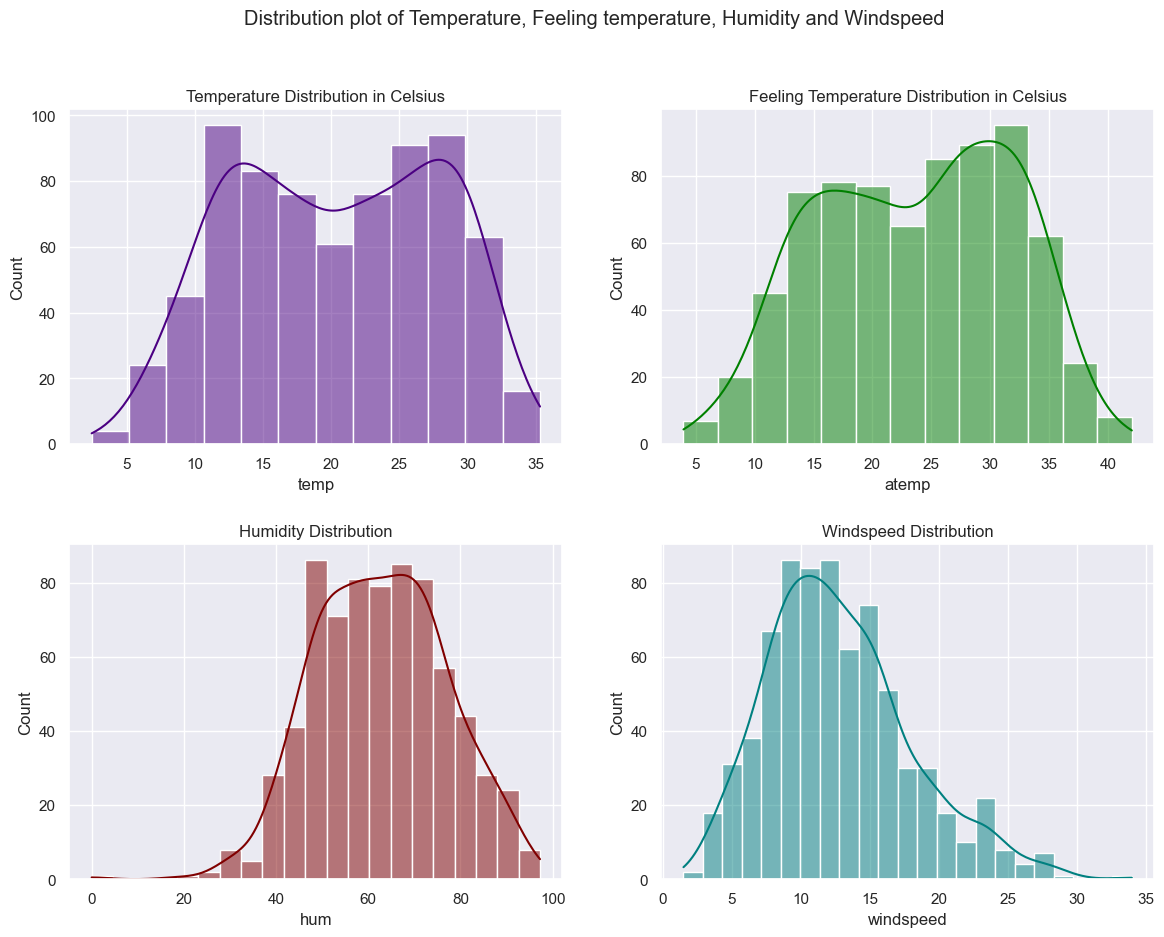

In [50]:
# histogram Plots of temp, atemp, hum, windspeed numerical columns
plt.figure(figsize=(14, 10))
sns.set_theme(style='darkgrid')

plt.subplot(2,2,1)
sns.histplot(bike.temp, kde=True, color='indigo')
plt.title("Temperature Distribution in Celsius")

plt.subplot(2,2,2)
sns.histplot(bike.atemp, kde=True, color='green')
plt.title("Feeling Temperature Distribution in Celsius")

plt.subplot(2,2,3)
sns.histplot(bike.hum, kde=True, color='maroon')
plt.title("Humidity Distribution")

plt.subplot(2,2,4)
sns.histplot(bike.windspeed, kde=True, color='teal')
plt.title("Windspeed Distribution")

plt.suptitle("Distribution plot of Temperature, Feeling temperature, Humidity and Windspeed")
plt.subplots_adjust(hspace=0.3) # This increases the space between 1st and 2nd row plots
plt.show()

In [51]:
# Checking skewness
round(bike[['temp','atemp','hum','windspeed']].skew(),3)

temp        -0.057
atemp       -0.134
hum         -0.067
windspeed    0.676
dtype: float64

- `temp`, `atemp` and `hum` skewness value is between -0.5 to 0.5, so we can conclude that the data is fairly symmetrical
- `windspeed` skewness value is 0.67 and we can conclude that the date is moderately skewed

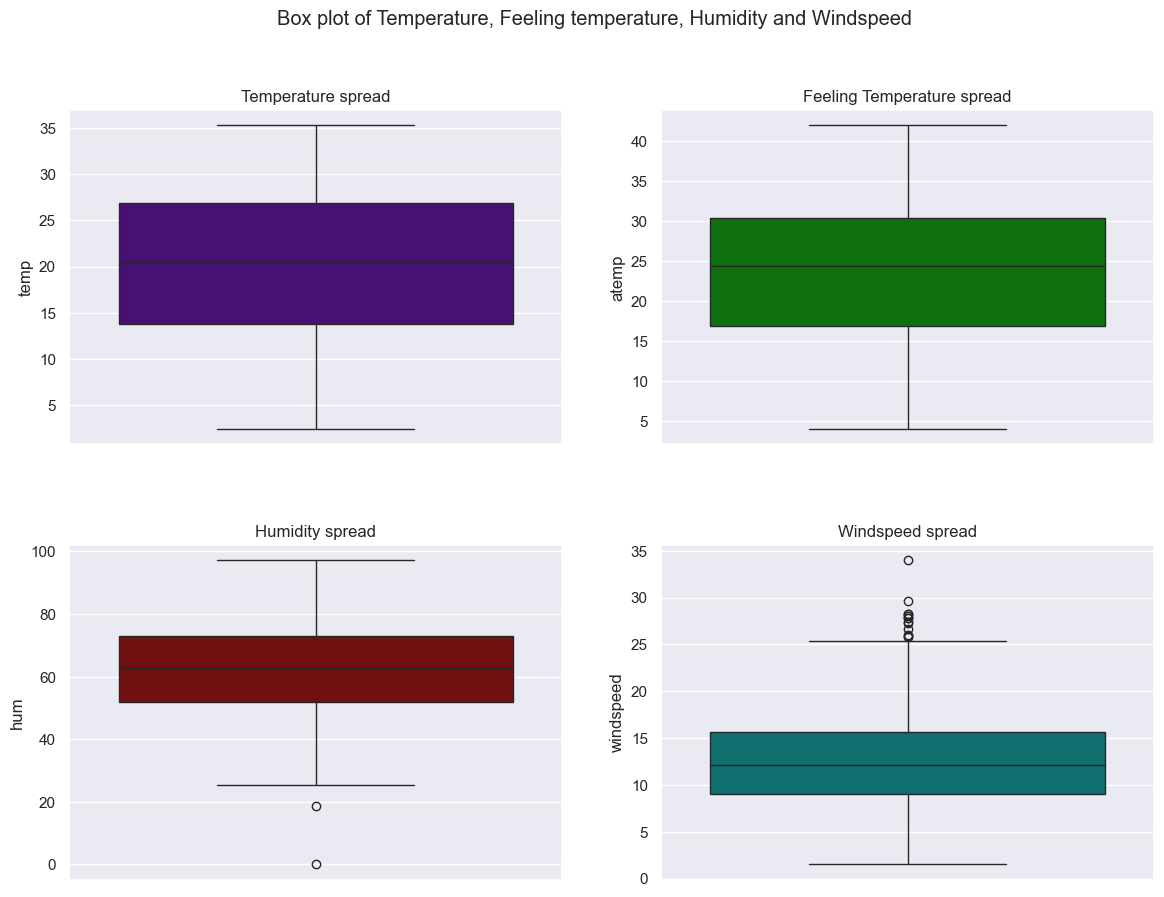

In [53]:
# Box plots of temp, atemp, hum, windspeed numerical columns
plt.figure(figsize=(14, 10))
sns.set_theme(style='darkgrid')

plt.subplot(2,2,1)
sns.boxplot(y=bike.temp, color='indigo')
plt.title('Temperature spread')

plt.subplot(2,2,2)
sns.boxplot(y=bike.atemp, color='green')
plt.title('Feeling Temperature spread')

plt.subplot(2,2,3)
sns.boxplot(y=bike.hum, color='maroon')
plt.title('Humidity spread')

plt.subplot(2,2,4)
sns.boxplot(y=bike.windspeed, color='teal')
plt.title('Windspeed spread')

plt.suptitle("Box plot of Temperature, Feeling temperature, Humidity and Windspeed")
plt.subplots_adjust(hspace=0.3)
plt.show()

 - As per the above boxplot we can conclude that there are no outliers in `temp` and `atemp` but there's presence of outliers in `hum` and `windspeed`

##### **Visualizing Categorical Variables**

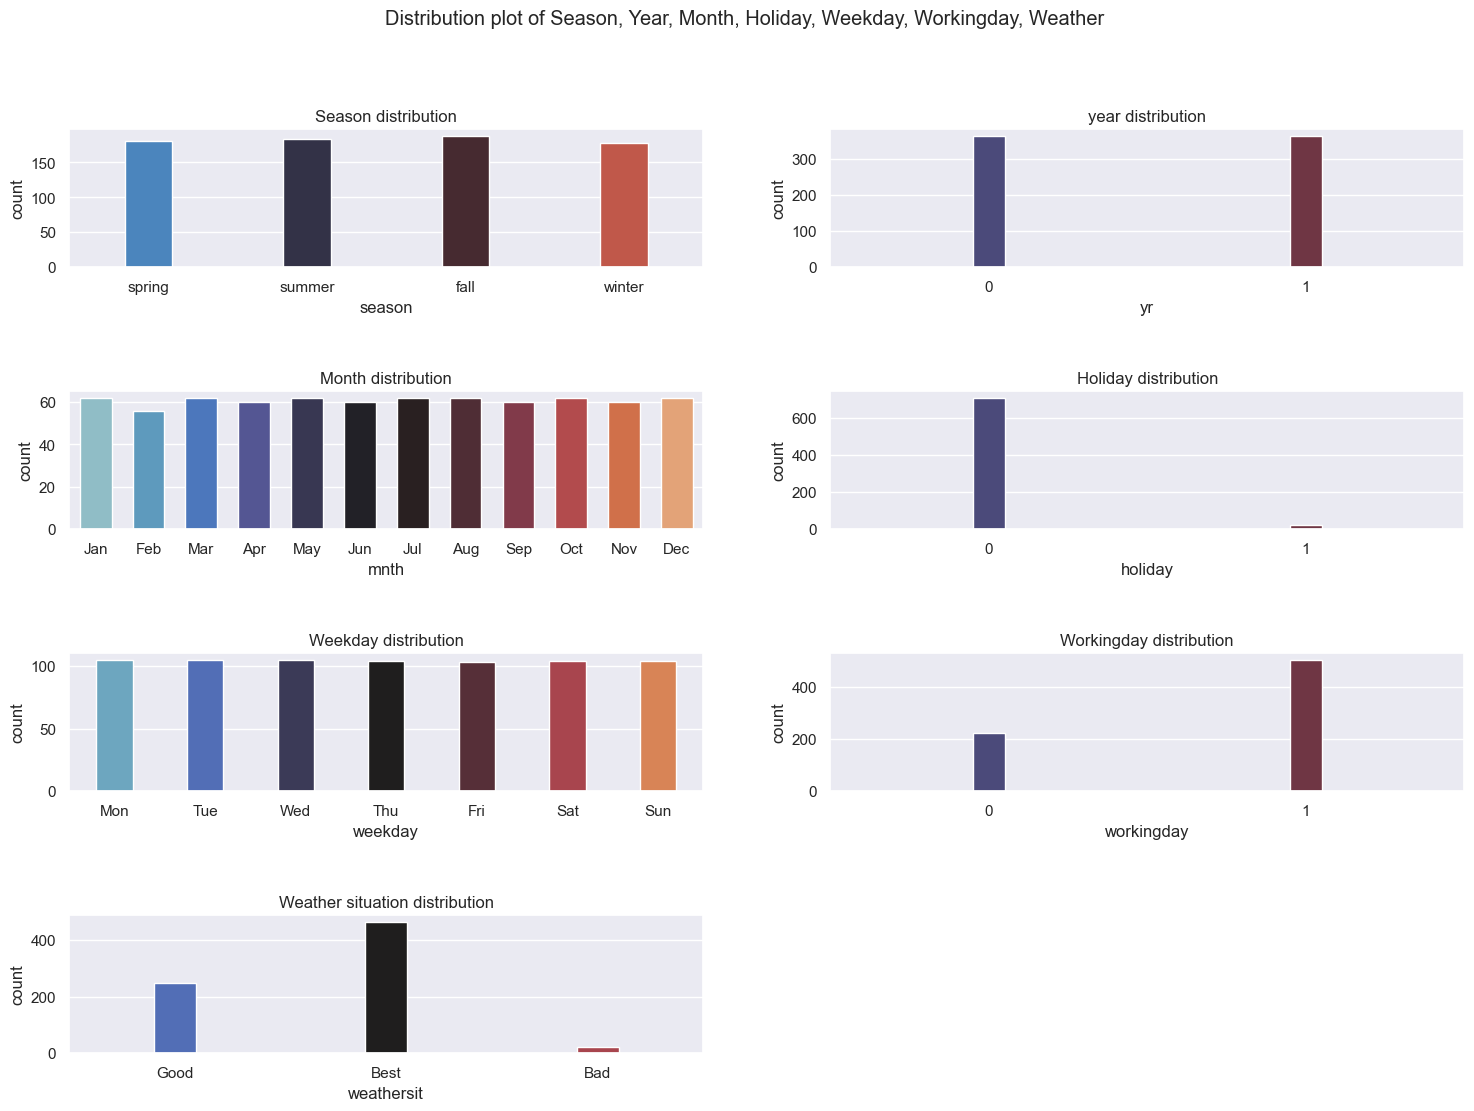

In [56]:
# Count plots of season, yr, mnth, holiday, weekday, workingday, weathersit columns
plt.figure(figsize=(18, 12))
sns.set_theme(style='darkgrid')

plt.subplot(4,2,1)
sns.countplot(x=bike.season, palette='icefire', width=0.3)
plt.title("Season distribution")

plt.subplot(4,2,2)
sns.countplot(x=bike.yr, palette='icefire', width=0.1)
plt.title("year distribution")

plt.subplot(4,2,3)
sns.countplot(x=bike.mnth, palette='icefire', width=0.6)
plt.title("Month distribution")

plt.subplot(4,2,4)
sns.countplot(x=bike.holiday, palette='icefire', width=0.1)
plt.title("Holiday distribution")

plt.subplot(4,2,5)
sns.countplot(x=bike.weekday, palette='icefire', width=0.4)
plt.title("Weekday distribution")

plt.subplot(4,2,6)
sns.countplot(x=bike.workingday, palette='icefire', width=0.1)
plt.title("Workingday distribution")

plt.subplot(4,2,7)
sns.countplot(x=bike.weathersit, palette='icefire', width=0.2)
plt.title("Weather situation distribution")


plt.suptitle("Distribution plot of Season, Year, Month, Holiday, Weekday, Workingday, Weather")
plt.subplots_adjust(hspace=0.9)
plt.show()

- **working day** is preferred over non-working day.
- **non-holiday** is highly preferred over holiday.
- **Clear i.e. Best** weather followed by **Good  i.e. mist + cloudy** weather is preferred over other weather situation.

### **Outlier Removal**

In [59]:
# Extracting only humidity and windspeed as only these two variables contain outliers
before_outlier = bike[['hum','windspeed']]

# We will be Using Outliers Removal process based on InterQuartile Range
Q1 = before_outlier.quantile(0.25)
Q3 = before_outlier.quantile(0.75)
IQR = Q3 - Q1

outliers = ((before_outlier < (Q1 - 1.5 * IQR)) | (before_outlier > (Q3 + 1.5 * IQR)))

after_outlier = before_outlier[~outliers.any(axis=1)]

In [60]:
# Again using all the columns after outlier removal
bike = bike.loc[after_outlier.index]

# Resetting index again
bike = bike.reset_index(drop=True)

In [61]:
# Checking shape of the dataset
print(f"Bike dataset consists of {bike.shape[0]} rows and {bike.shape[1]} columns")

Bike dataset consists of 716 rows and 12 columns


### **Bivariate Analysis**

<Figure size 2000x1500 with 0 Axes>

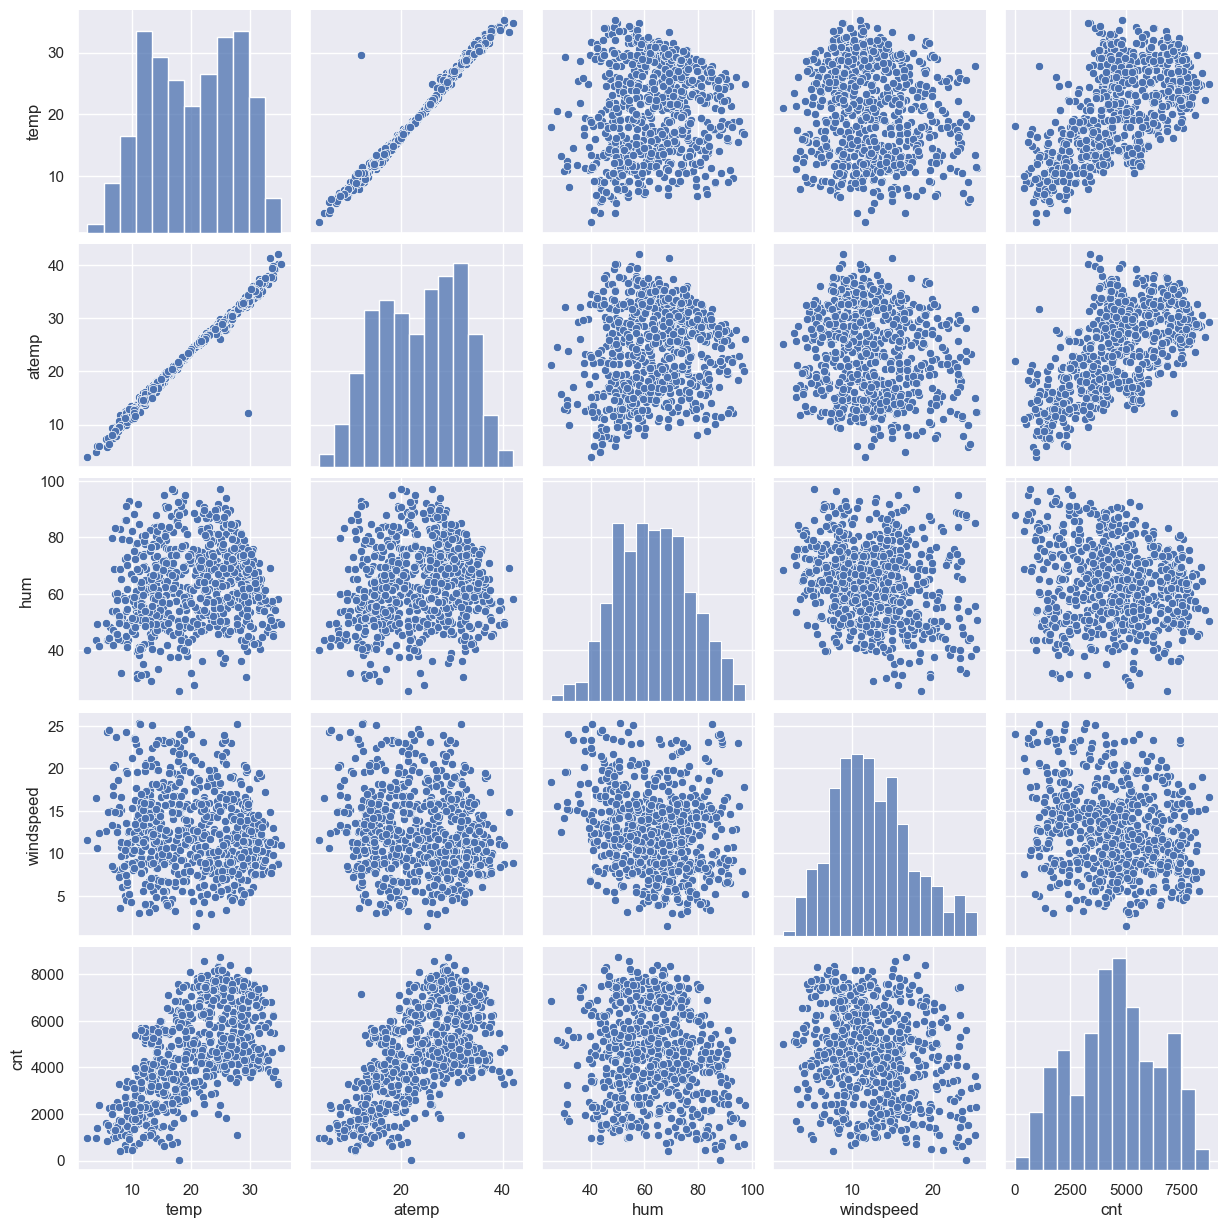

In [63]:
# Creating pairplot for continuous numerical variables
plt.figure(figsize=(20,15))
sns.set_theme(style='darkgrid')

sns.pairplot(data=bike, vars=['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()

- We can observed linearity between temp, atemp and can also see that both the column data looks somewhat same. Maybe they are highly collinear.

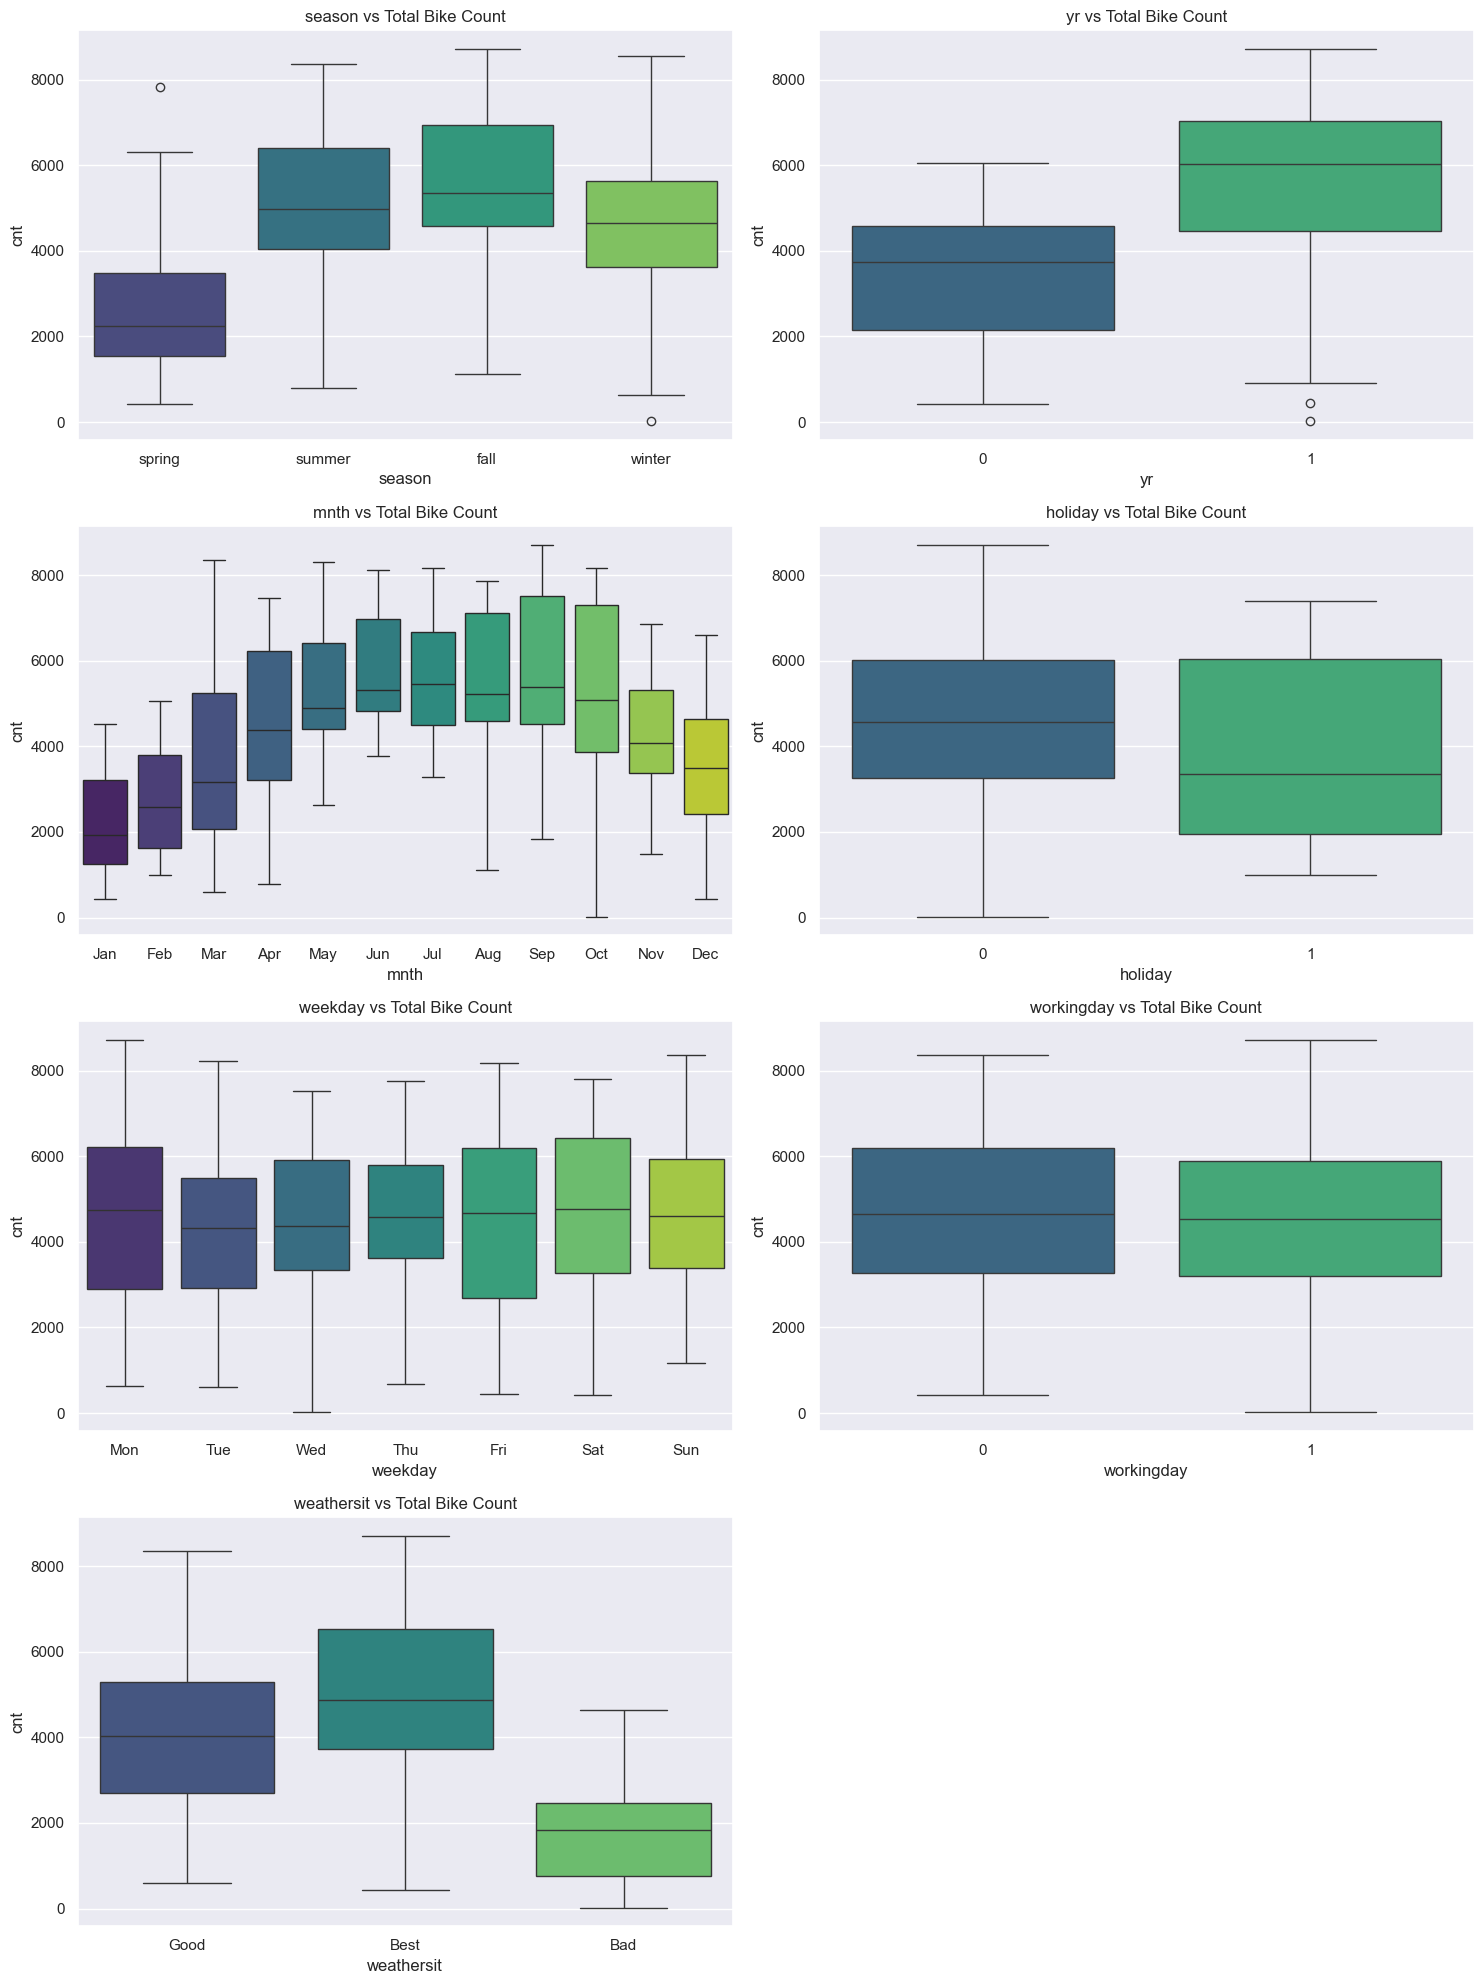

In [65]:
# Box plot for Categorical variables against target variable "cnt"
plt.figure(figsize=(15,20))
sns.set_theme(style='darkgrid')
def plot_box(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x + ' vs Total Bike Count')
    sns.boxplot(data=bike, x=x, y='cnt', palette="viridis")

plot_box('season', 1)
plot_box('yr', 2)
plot_box('mnth', 3)
plot_box('holiday', 4)
plot_box('weekday', 5)
plot_box('workingday', 6)
plot_box('weathersit', 7)

plt.tight_layout()
plt.show()

- **fall** season has highest demand followed by **summer** season
- **year 1** i.e. 2019 has higher demand than previous year (2018), so demand increasing over the year
- Non holiday were preferred over holiday for bike sharing
- `workingday` were preferred over non working day for bike sharing
- High bike sharing is high when weather condition were `Best` followed by `Good`

#### **Correlation Analysis**

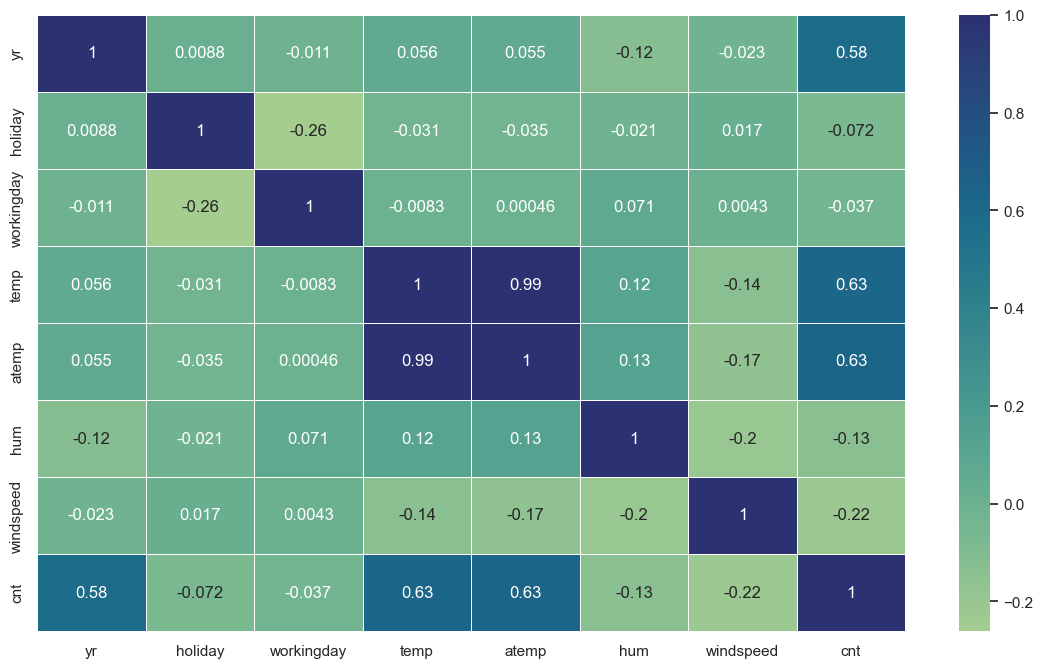

In [68]:
# Creating Correlation heatmap for numerical variables
plt.figure(figsize=(14,8))
sns.heatmap(bike.corr(numeric_only=True), annot=True, cmap="crest", linewidths=.6)
plt.show()

- Target variable `cnt` has positive correlation with `yr`, `temp` and `atemp`.
- `cnt` has negative correlation with `windspeed` and `hum`.
- As of now it seems `holiday` and `workingday` has weak correlation with target variable `cnt`. We will not be dropping these variable at this stage without getting confirmation of the same at model building stage

- `temp` and `atemp` are highly correlated, so there is multicollinearity and we will be dropping `atemp` from the dataset

In [71]:
bike = bike.drop(columns=['atemp'], axis=1)

### **Deriving New Features**
- We will be creating new variables based on `hum` and `windspeed` combination interaction terms and checking whether it has any kind of relationship

In [73]:
# Deriving new columns/variables
bike['hum_windspeed'] = bike['hum']*bike['windspeed']

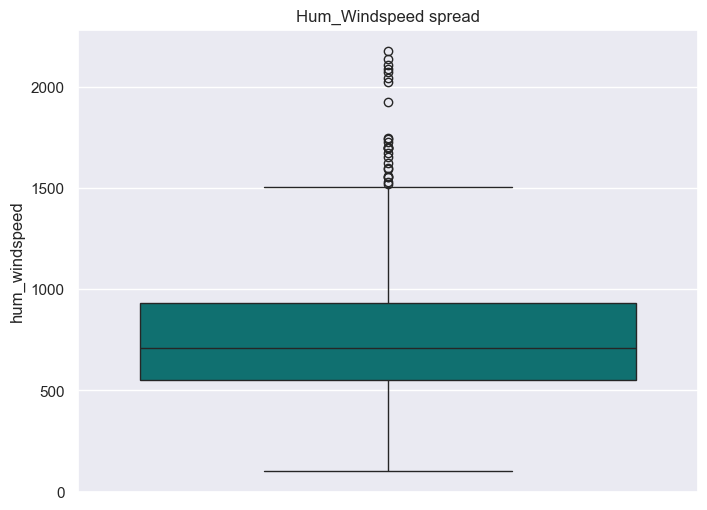

In [74]:
# Box plot for new derived variable
plt.figure(figsize=(8,6))
sns.boxplot(y=bike.hum_windspeed, color='teal')
plt.title('Hum_Windspeed spread')
plt.show()

**Outlier Treatment after new derived variable creation**

In [76]:
before_outlier = bike[['hum_windspeed']] 

# We will be Using Outliers Removal process based on InterQuartile Range
Q1 = before_outlier.quantile(0.25)
Q3 = before_outlier.quantile(0.75)
IQR = Q3 - Q1

outliers = ((before_outlier < (Q1 - 1.5 * IQR)) | (before_outlier > (Q3 + 1.5 * IQR)))

after_outlier = before_outlier[~outliers.any(axis=1)]

In [77]:
# Again using all the columns after outlier removal
bike = bike.loc[after_outlier.index]

# Resetting index again
bike = bike.reset_index(drop=True)

In [78]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,hum_windspeed
0,spring,0,Jan,0,Mon,1,Good,14.110847,80.5833,10.749882,985,866.260966
1,spring,0,Jan,0,Tue,1,Good,14.902598,69.6087,16.652113,801,1159.131938
2,spring,0,Jan,0,Wed,1,Best,8.050924,43.7273,16.636703,1349,727.478103
3,spring,0,Jan,0,Thu,1,Best,8.200000,59.0435,10.739832,1562,634.117271
4,spring,0,Jan,0,Fri,1,Best,9.305237,43.6957,12.522300,1600,547.170664


Let's see how derived variables correlates with other variables

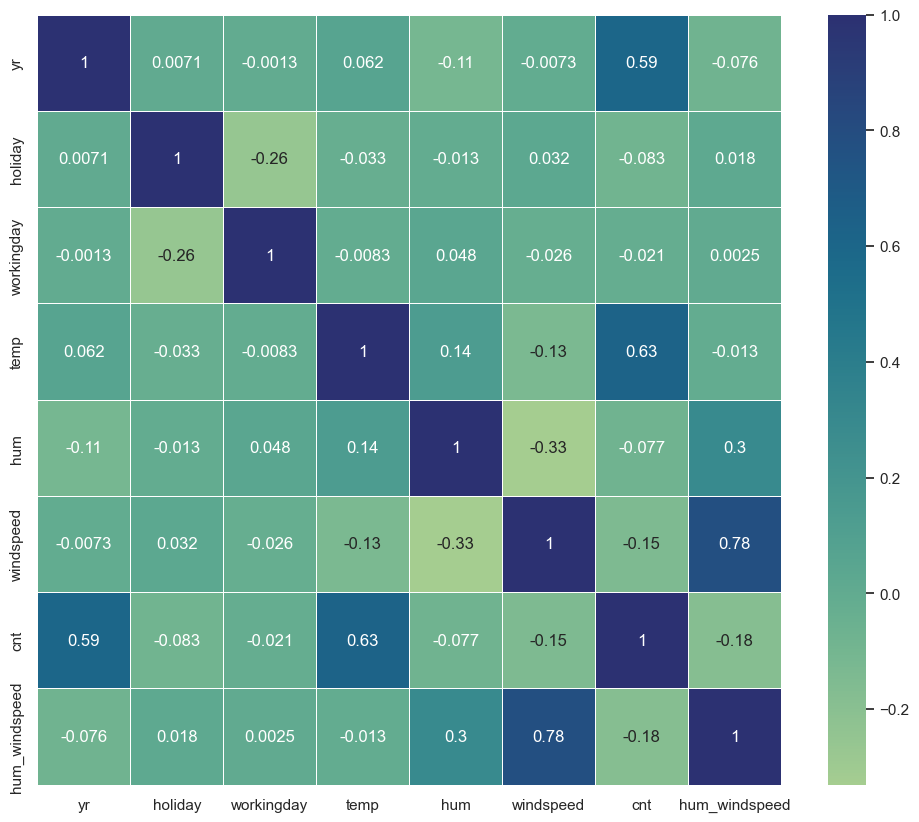

In [80]:
# Numerical variables Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(bike.corr(numeric_only=True), annot=True, cmap="crest", linewidths=.6)
plt.show()

- Derived variable `hum_windspeed` is negatively correlated with target variable `cnt`. Also, it has weak correlation with `yr`, `holiday`, `workingday`, and `temp`.

##### **List of Significant Variables after Analysis**
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit
- temp
- hum
- windspeed
- hum_windspeed

In [83]:
# Bike dataset shape after analysis
bike.shape

(691, 12)

### **Dummy Variables Creation / One Hot Encoding**
- We will be selecting `object` datatypes from the bike dataset that are basically categorical variables.
- Also, `yr`, `holiday` and `workingday` are already having 0 and 1 i.e. binary coded so no need to create dummy variable for the same

In [85]:
# Filtering out "object" datatypes for dummification
cat_cols = list(bike.select_dtypes('object').columns)
cat_cols

['season', 'mnth', 'weekday', 'weathersit']

In [86]:
# Creating dummy variables
bike = pd.get_dummies(bike, columns=cat_cols, drop_first=True, dtype=int) 

# drop_first = True will remove 1 category from the original categories

In [87]:
# Let's check how bike dataset looks like after One Hot Encoding
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,hum_windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Best,weathersit_Good
0,0,0,1,14.110847,80.5833,10.749882,985,866.260966,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1159.131938,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,727.478103,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,634.117271,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,547.170664,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [88]:
# Bike dataset shape after One Hot Encoding
bike.shape

(691, 30)

In [89]:
#Let's create a copy of the bike dataset so that any modification at this stage won't change already analysed dataset
bike_new = bike.copy()
bike_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,hum_windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Best,weathersit_Good
0,0,0,1,14.110847,80.5833,10.749882,985,866.260966,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1159.131938,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,727.478103,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,634.117271,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,547.170664,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### **Train Test Split**
- We will be creating train and test set and split the same into 70% and 30% respectively

In [91]:
# splitting the bike dataset
np.random.seed(10)
df_train, df_test = train_test_split(bike_new, train_size=.70, random_state=10)

### **Feature Scaling**
- We will be using MinMax Scaler for feature scaling that transforms the feature from 0 to 1 value

In [93]:
# Creating an object
scaler = MinMaxScaler()

# Selecting continuous feature variables
num_vars = ['cnt','temp', 'hum', 'windspeed', 'hum_windspeed']

# Fitting and Transforming at the same time
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [94]:
# Dividing data into X and y variables

X_train = df_train.drop(columns=['cnt'])
y_train = df_train['cnt']

# shape of X_train and y_train
X_train.shape, y_train.shape

((483, 29), (483,))

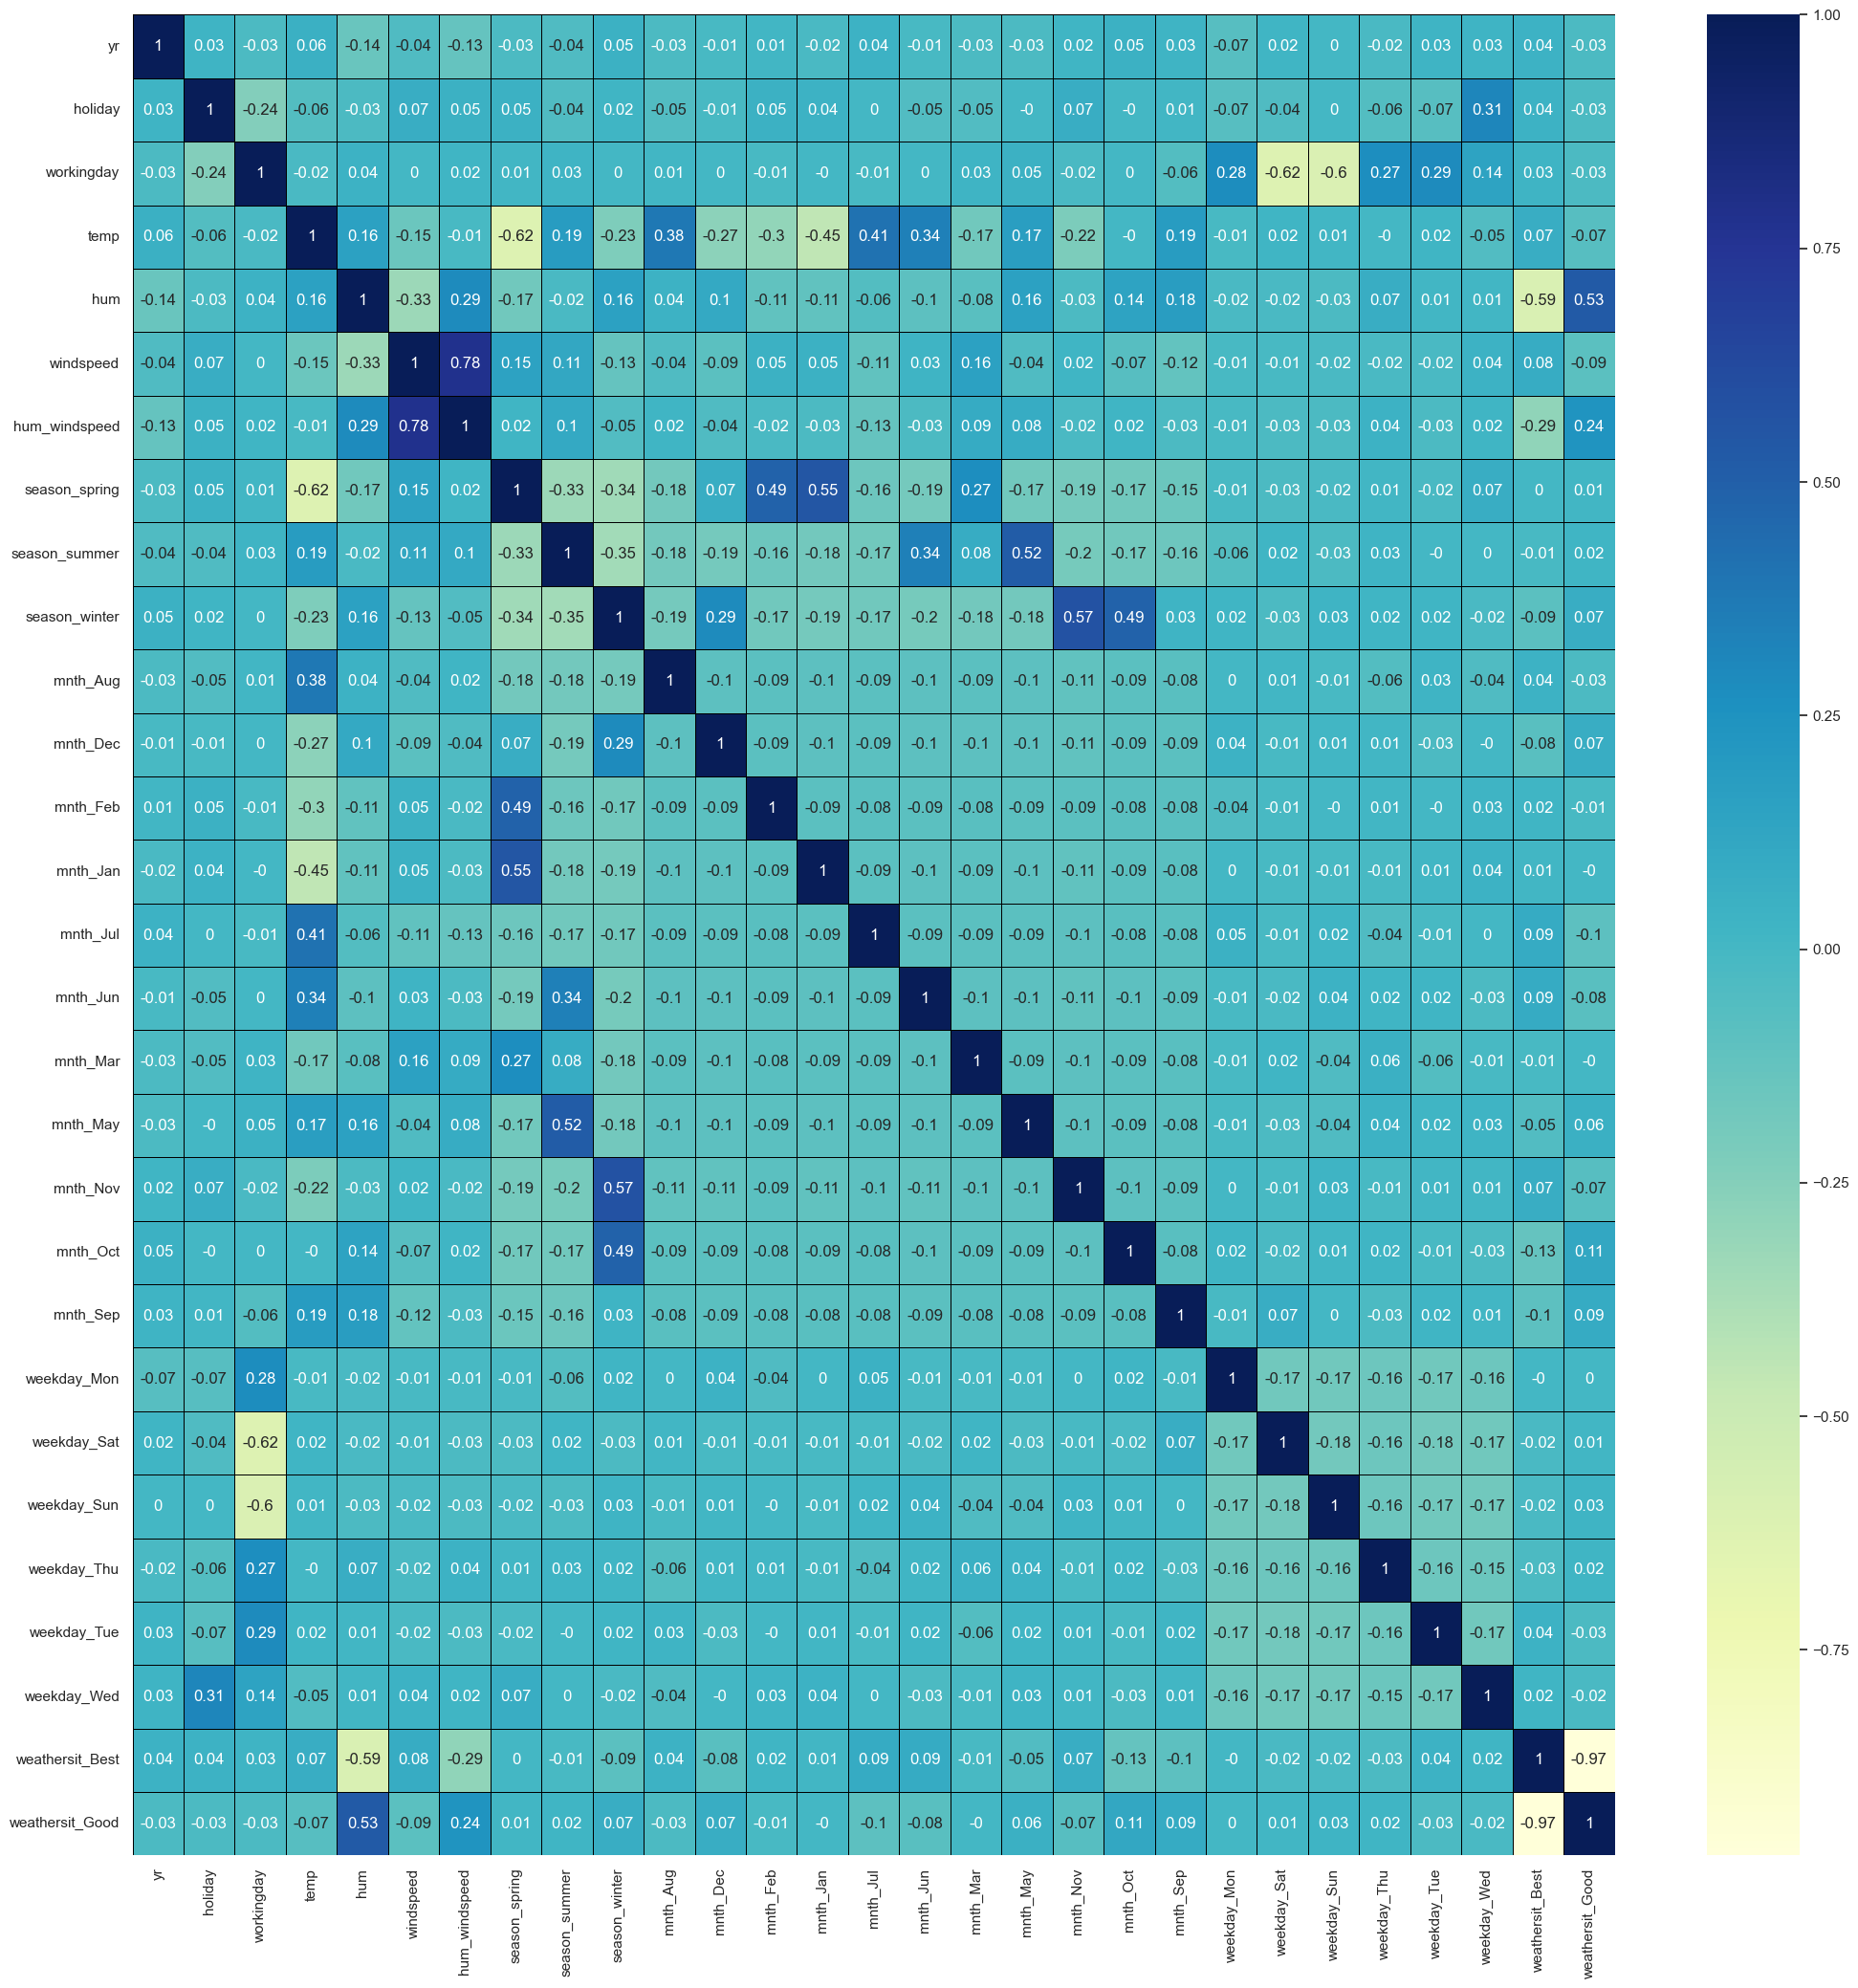

In [95]:
#Correlation matrix using heatmap
plt.figure(figsize = (25, 25))
sns.heatmap(round(X_train.corr(),2), annot = True, cmap="YlGnBu", linewidths=.5, linecolor='black')
plt.show()

### **Model Building**
- We will be using **RFE** (Recursive Feature Elimination) for top feature selection.
- p-value and VIF (Variance Inflation Factor) for feature elimination
-  and using **statsmodel OLS** for model building

In [97]:
# Checking total X_train columns
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'hum_windspeed', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Best', 'weathersit_Good'],
      dtype='object')

In [98]:
# Checking length of X_train
len(X_train.columns)

29

In [99]:
# Running RFE with the output number of the variable equal to 14

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=14)   # Running rfe
rfe = rfe.fit(X_train, y_train)

In [100]:
# THis provides True for all the features selected by RFE and False for features not selected
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
        True,  True])

In [101]:
# Putting feature variables, RFE result in a list
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('hum_windspeed', False, 15),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', False, 5),
 ('weekday_Mon', False, 16),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 11),
 ('weathersit_Best', True, 1),
 ('weathersit_Good', True, 1)]

In [102]:
# Columns rfe selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Nov', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Best', 'weathersit_Good'],
      dtype='object')

In [103]:
# Columns rfe did not select
X_train.columns[~rfe.support_]

Index(['hum_windspeed', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [104]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,mnth_Nov,weekday_Sat,weekday_Sun,weathersit_Best,weathersit_Good
151,0,0,0,0.735215,0.660287,0.293429,0,0,0,0,0,1,1,0
629,1,0,0,0.611648,0.752991,0.237361,0,1,0,0,1,0,0,1
512,1,0,0,0.965734,0.305622,0.360720,0,0,0,0,0,1,1,0
577,1,0,1,0.794402,0.773924,0.056106,0,0,0,0,0,0,0,1
665,1,0,1,0.490158,0.705742,0.112162,0,1,0,0,0,0,1,0


In [105]:
# X_train shape after RFE selected features
X_train_rfe.shape

(483, 14)

In [106]:
# This function will be used to check the VIF values of the independent variables
def VIF_check(df):
    vif = pd.DataFrame() # dataframe to store VIF values
    vif['Features'] = df.columns # Storing feature names
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2) # Round off the VIF values to 2 decimal places
    vif = vif.sort_values(by = "VIF", ascending = False) # Sorting in descending order
    return vif

#### **Model 1**

In [108]:
# Adding a constant variable  
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Fitting the model
lr_model_1 = sm.OLS(y_train, X_train_lm_1).fit()

#Printing model summary
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.72e-166
Time:                        13:47:04   Log-Likelihood:                 432.02
No. Observations:                 483   AIC:                            -834.0
Df Residuals:                     468   BIC:                            -771.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2004      0.088     

In [109]:
# Calculating the Variance Inflation Factor
VIF_check(X_train_lm_1)

,Features,VIF
0,const,374.17
3,workingday,48.18
11,weekday_Sat,28.76
12,weekday_Sun,27.22
13,weathersit_Best,18.99
14,weathersit_Good,16.96
2,holiday,4.45
4,temp,3.20
7,season_spring,2.83
8,season_winter,2.26


- We will be dropping `weekday_Sat` from the model as it is having higher p-value (0.136) than the significance level 0.05.

In [111]:
X_train_new = X_train_rfe.drop(["weekday_Sat"], axis = 1)

#### **Model 2**

In [113]:
# Adding a constant variable  
X_train_lm_2 = sm.add_constant(X_train_new)

# Fitting the model
lr_model_2 = sm.OLS(y_train, X_train_lm_2).fit()

#Printing model summary
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     168.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.94e-167
Time:                        13:47:04   Log-Likelihood:                 430.88
No. Observations:                 483   AIC:                            -833.8
Df Residuals:                     469   BIC:                            -775.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0971      0.055     

In [114]:
# Calculating the Variance Inflation Factor
VIF_check(X_train_lm_2)

,Features,VIF
0,const,145.24
12,weathersit_Best,18.99
13,weathersit_Good,16.96
4,temp,3.18
7,season_spring,2.81
8,season_winter,2.25
5,hum,2.12
3,workingday,1.75
11,weekday_Sun,1.64
10,mnth_Nov,1.57


- We will be dropping `weekday_Sun` from the model as it is having higher p-value (0.452) than the significance level 0.05.

In [116]:
X_train_new = X_train_new.drop(["weekday_Sun"], axis = 1)

#### **Model 3**

In [118]:
# Adding a constant variable  
X_train_lm_3 = sm.add_constant(X_train_new)

# Fitting the model
lr_model_3 = sm.OLS(y_train, X_train_lm_3).fit()

#Printing model summary
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     182.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.78e-168
Time:                        13:47:04   Log-Likelihood:                 430.58
No. Observations:                 483   AIC:                            -835.2
Df Residuals:                     470   BIC:                            -780.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0932      0.055     

In [119]:
# Calculating the Variance Inflation Factor
VIF_check(X_train_lm_3)

,Features,VIF
0,const,143.96
11,weathersit_Best,18.93
12,weathersit_Good,16.89
4,temp,3.18
7,season_spring,2.81
8,season_winter,2.25
5,hum,2.12
10,mnth_Nov,1.57
9,mnth_Jul,1.27
6,windspeed,1.23


- We will be dropping `weathersit_Best` as it is showing high VIF value than the threshold i.e. 5.	

In [121]:
X_train_new = X_train_new.drop(["weathersit_Best"], axis = 1)

#### **Model 4**

In [123]:
# Adding a constant variable  
X_train_lm_4 = sm.add_constant(X_train_new)

# Fitting the model
lr_model_4 = sm.OLS(y_train, X_train_lm_4).fit()

#Printing model summary
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.13e-165
Time:                        13:47:05   Log-Likelihood:                 420.92
No. Observations:                 483   AIC:                            -817.8
Df Residuals:                     471   BIC:                            -767.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2929      0.031     

In [124]:
# Calculating the Variance Inflation Factor
VIF_check(X_train_lm_4)

,Features,VIF
0,const,44.76
4,temp,3.14
7,season_spring,2.80
8,season_winter,2.25
5,hum,1.81
10,mnth_Nov,1.57
11,weathersit_Good,1.50
9,mnth_Jul,1.26
6,windspeed,1.19
2,holiday,1.08


- We will be dropping `workingday` from the model as it is having higher p-value (0.061) than the significance level 0.05.

In [126]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

#### **Model 5**

In [128]:
# Adding a constant variable  
X_train_lm_5 = sm.add_constant(X_train_new)

# Fitting the model
lr_model_5 = sm.OLS(y_train, X_train_lm_5).fit()

#Printing model summary
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     207.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.23e-165
Time:                        13:47:05   Log-Likelihood:                 419.11
No. Observations:                 483   AIC:                            -816.2
Df Residuals:                     472   BIC:                            -770.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2805      0.031     

In [129]:
# Calculating the Variance Inflation Factor
VIF_check(X_train_lm_5)

,Features,VIF
0,const,42.75
3,temp,3.14
6,season_spring,2.80
7,season_winter,2.25
4,hum,1.80
9,mnth_Nov,1.57
10,weathersit_Good,1.49
8,mnth_Jul,1.26
5,windspeed,1.19
1,yr,1.06


- Now all the independent variables have p-value less than 0.05 and also VIF value less than 5.
- This suggest that the variables are significant and also theres is no multicollinearity

### **Residual Analysis**

In [132]:
# Predicting the training set target variable y_train_pred based on last finalized model
y_train_pred = lr_model_5.predict(X_train_lm_5)

# Calculating Residual mean
(y_train-y_train_pred).mean()

-1.432256659718292e-15

- Mean of the residuals approximately equal to zero suggesting that it follows a normal distribution

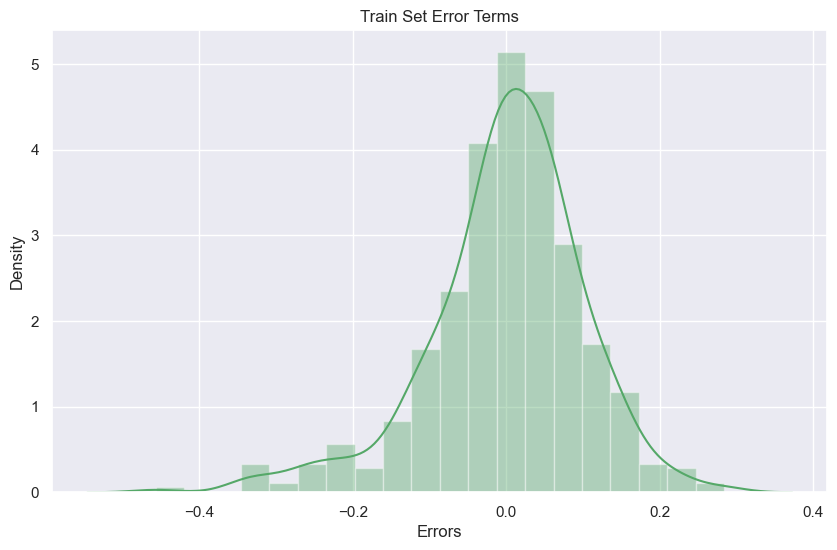

In [134]:
# Plot the histogram of the error terms
plt.figure(figsize=(10,6))
sns.distplot((y_train-y_train_pred), bins = 20, color='g')
plt.title('Train Set Error Terms') 
plt.xlabel('Errors', fontsize = 12) 
plt.show()

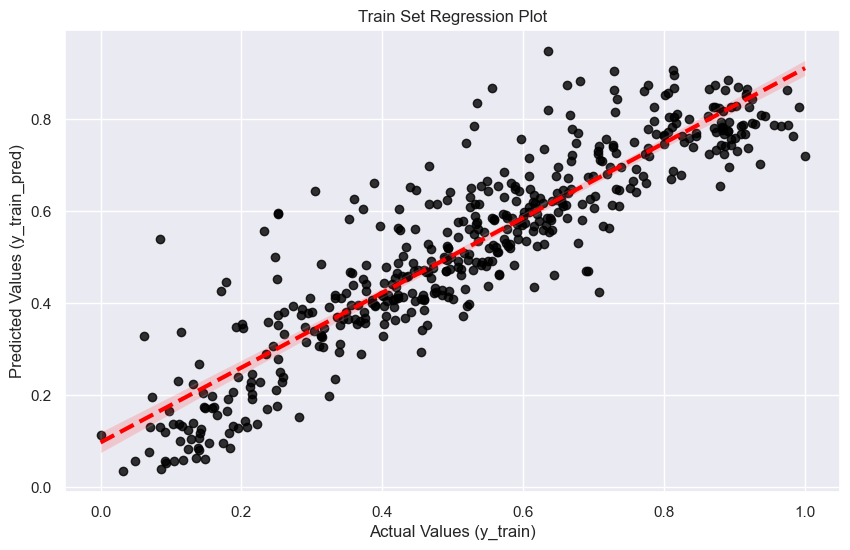

In [135]:
# Regression plot for Train set
plt.figure(figsize=(10, 6))
sns.regplot(x=y_train, y=y_train_pred, 
            marker='o', 
            color='black', 
            line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 3})
plt.title('Train Set Regression Plot')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.show()

- We can observe that the most of the data points are close to the regression line suggesting the the model is working well on the train set

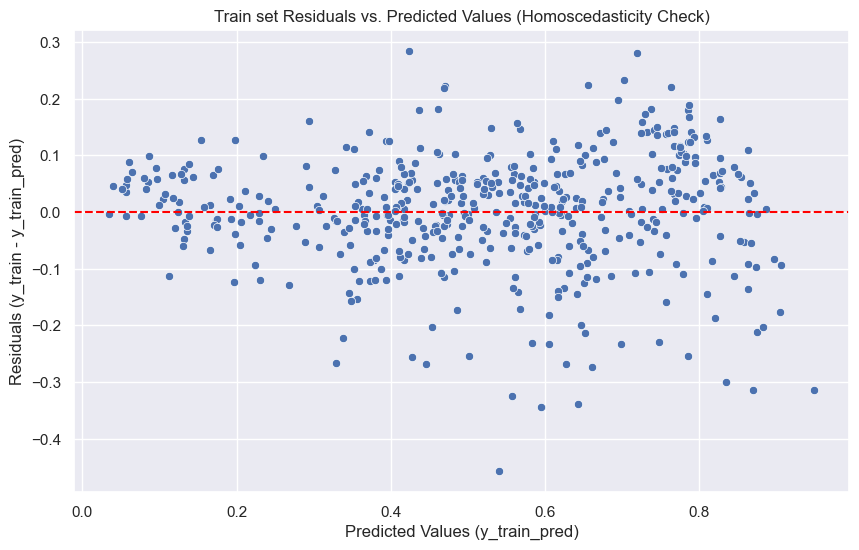

In [137]:
# Creating scatter plot for checking Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=y_train-y_train_pred)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Predicted Values (y_train_pred)')
plt.ylabel('Residuals (y_train - y_train_pred)')
plt.title('Train set Residuals vs. Predicted Values (Homoscedasticity Check)')
plt.show()

- The residuals are randomly scattered around the zero line indicating that the residuals are centered around zero

### **Prediction on test set**

In [140]:
# Selecting continuous feature variables
num_vars = ['cnt','temp', 'hum', 'windspeed','hum_windspeed']

# Transforming test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [141]:
# Dividing data into X and y variables
X_test = df_test.drop(columns=['cnt'])
y_test = df_test['cnt']

# shape of X_test and y_test
X_test.shape, y_test.shape

((208, 29), (208,))

In [142]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

# Creating X_test_new dataframe by selecting last finalized model variables
X_test_new = X_test_new[X_train_lm_5.columns]

# Making predictions
y_test_pred = lr_model_5.predict(X_test_new)

### **Model Evaluation (R2, Adjusted R2, MSE, RMSE)**

In [144]:
# Printing R-squared for train set 
r_squared_train = round(lr_model_5.rsquared,3)
print(f"R-squared for train set is {r_squared_train}")

R-squared for train set is 0.815


In [145]:
# Printing adjusted R-squared for train set
adj_r_squared_train = round(lr_model_5.rsquared_adj,3)
print(f"Adjusted R-squared for train set is {adj_r_squared_train}")

Adjusted R-squared for train set is 0.811


In [146]:
# Calculating R-squared for test set 
r_squared_test = round(r2_score(y_test,y_test_pred),3)
print(f"R-squared for test set is {r_squared_test}")

R-squared for test set is 0.834


In [147]:
# Calculating adjusted R-squared for test set
adj_r_squared_test = round(1-(1-r_squared_test)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),3)
print(f"Adjusted R-squared for test set is {adj_r_squared_test}")

Adjusted R-squared for test set is 0.825


In [148]:
# Calculating Mean Squared Error for train set
mse_train = round(mean_squared_error(y_train, y_train_pred),4)
print(f"Mean Squared Error for train set is {mse_train}")

Mean Squared Error for train set is 0.0103


In [149]:
# Calculating Mean Squared Error for test set
mse_test = round(mean_squared_error(y_test, y_test_pred),4)
print(f"Mean Squared Error for test set is {mse_test}")

Mean Squared Error for test set is 0.0101


In [150]:
# Calculating Root Mean Squared Error for train set
rmse_train = round(np.sqrt(mse_train),4)
print(f"Root Mean Squared Error for train set is {rmse_train}")

Root Mean Squared Error for train set is 0.1015


In [151]:
# Calculating Root Mean Squared Error for test set
rmse_test = round(np.sqrt(mse_test),4)
print(f"Root Mean Squared Error for test set is {rmse_test}")

Root Mean Squared Error for test set is 0.1005


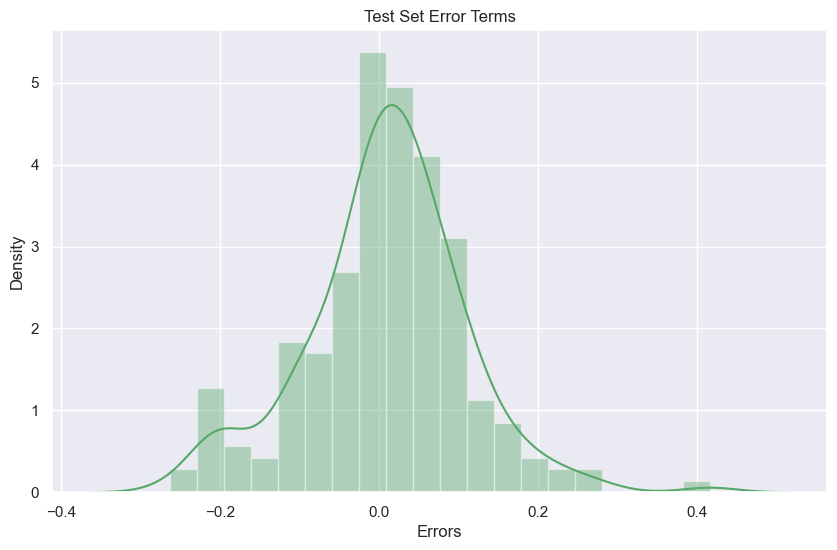

In [152]:
# Plotting the histogram of the test set error terms
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_test_pred), bins = 20, color='g')
plt.title('Test Set Error Terms') 
plt.xlabel('Errors', fontsize = 12) 
plt.show()

In [153]:
# Calculating Residual mean for test set
round((y_test-y_test_pred).mean(),5)

0.00885

- This mean value indicates that the predicted test values is very close to the actual values, so there's minimal bias in model predictions

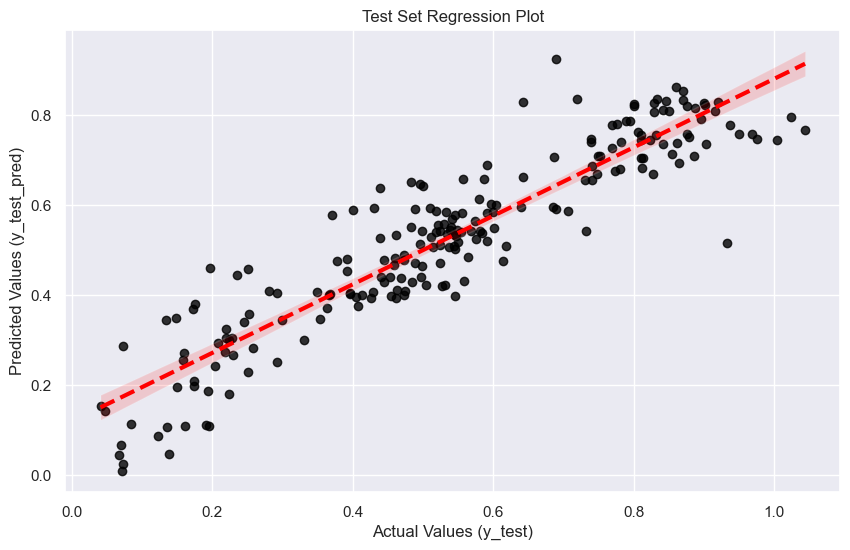

In [155]:
# Regression plot for Test set
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_test_pred, 
            marker='o', 
            color='black', 
            line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 3})
plt.title('Test Set Regression Plot')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.show()

- The R-squared and Adjusted R-squared values are slightly higher for the test set compared to the training set. This suggests that the final model is generalizing well to unseen/test dataset.
- Also, close values of **Mean Squared Error (MSE)** for both the training and test sets suggests that there is no significant overfitting or underfitting. This indicates that the model performs consistently across both dataset.
- The low values of **MSE and RMSE (Root Mean Squared Error)** suggests that the model predictions are accurate and generalizes well to unseen data.
- `mean` residual of **0.00885** on test set is quite close to zero which indicates that the model predictions are unbiased and a good overall fit.

### **Cross Validation and Performance**

In [158]:
# Cross Validation and performance of final model on different partition of dataset
result = cross_validate(lm, X_train_lm_5, y_train, cv=10, scoring=('r2'), return_train_score=True)

# Creating a dataframe to store cross validation result
cvs_score = pd.DataFrame(result)

# Printing Cross Validation score
print(cvs_score)

   fit_time  score_time  test_score  train_score
0  0.000000    0.000000    0.713203     0.823864
1  0.000000    0.000000    0.816230     0.813942
2  0.015638    0.000000    0.806705     0.814909
3  0.000000    0.000000    0.844494     0.810764
4  0.000000    0.000000    0.747199     0.821587
5  0.000000    0.000000    0.795869     0.815974
6  0.000000    0.000000    0.734553     0.820852
7  0.000000    0.015622    0.854780     0.810065
8  0.000000    0.000000    0.849318     0.809406
9  0.000000    0.000000    0.856227     0.809480


In [159]:
print(f"R-squared median value (cross validation): {cvs_score.test_score.median():0.3f}")
print(f"R-squared mean value (cross validation): {cvs_score.test_score.mean():0.3f}")

R-squared median value (cross validation): 0.811
R-squared mean value (cross validation): 0.802


- The R-squared values suggests that the model explains around 80% to 81% of the variance in the dependent variable across different folds. This suggests a good overall fit.
- The relatively high and consistent train scores, along with the high test scores, indicate that the model generalizes well to new data or test data.

### **Conclusion and Recommendation**

In [162]:
# Final important independent variables
print(lr_model_5.params)

const              0.280478
yr                 0.242293
holiday           -0.066365
temp               0.540051
hum               -0.180067
windspeed         -0.111587
season_spring     -0.129690
season_winter      0.078391
mnth_Jul          -0.097828
mnth_Nov          -0.047015
weathersit_Good   -0.036315
dtype: float64


- With high R-squared (0.815) for train set and test set (0.834), this model explains the variability of the dependent variable i.e. `cnt` suggesting that the model fits the data quite well.
- `yr` (Year) has positive coefficient indicating that the demand is increasing over the time. So, demand is more in 2019 compared to 2018.
- `holiday` has negative coefficient indicating that the demand decreases on holidays.
- `temp` (Temperature) as positive coefficient indicating that there are higher demands when there's increase in temprature.
- `hum` (Humidity) has negative coefficient indicating that the higher humidity gradually decreases the demand for bikes.
- `windspeed` has negative coefficient which indicates that the higher wind speed decreases the demand.
- `season_spring` has negative coefficient indicating negative impact on the demand while `season_winter` has positive coefficient indicating positive impact on the demand.
- `mnth_Jul`, `mnth_Nov` and `weathersit_Good` have negative coefficients indicating negative impact on the demand.

We can conclude that the above mentioned variables are some of the different variables which affect bike demand dynamics and we can say that the analysis of seasonal trends can really help in planning and forecasting bike demands precisely.